In [3]:
from sub_index import get_PM25_subindex, get_PM10_subindex, get_CO_subindex, get_O3_subindex, get_SO2_subindex, get_NOx_subindex

In [4]:
import pandas as pd
import numpy as np
from decimal import Decimal
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define AQI sub-index functions (Already provided, assuming they are correct)
# get_PM25_subindex(), get_PM10_subindex(), get_SO2_subindex(), get_NOx_subindex(), get_CO_subindex(), get_O3_subindex()

# Load the dataset
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Replace with your dataset file

# Convert pollutant values to sub-indices
df["PM2.5_SubIndex"] = df["pm2_5 (μg/m³)"].apply(lambda x: get_PM25_subindex(x) if pd.notna(x) else None)
df["PM10_SubIndex"] = df["pm10 (μg/m³)"].apply(lambda x: get_PM10_subindex(x) if pd.notna(x) else None)
df["SO2_SubIndex"] = df["sulphur_dioxide (μg/m³)"].apply(lambda x: get_SO2_subindex(x) if pd.notna(x) else None)
df["NOx_SubIndex"] = df["nitrogen_dioxide (μg/m³)"].apply(lambda x: get_NOx_subindex(x) if pd.notna(x) else None)
df["CO_SubIndex"] = df["carbon_monoxide (μg/m³)"].apply(lambda x: get_CO_subindex(x) if pd.notna(x) else None)
df["O3_SubIndex"] = df["ozone (μg/m³)"].apply(lambda x: get_O3_subindex(x) if pd.notna(x) else None)

# Drop rows with missing values (optional: you can also use imputation)
df.dropna(subset=["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex", "CO_SubIndex", "O3_SubIndex", "AQI"], inplace=True)

# Define Features (X) and Target (y)
X = df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex", "CO_SubIndex", "O3_SubIndex"]]
y = df["AQI"]

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 2.38
Root Mean Squared Error (RMSE): 1.54
R² Score: 0.9996


In [ ]:
print(df.dtypes)


time                         object
pm10 (μg/m³)                float64
pm2_5 (μg/m³)               float64
carbon_monoxide (μg/m³)     float64
nitrogen_dioxide (μg/m³)    float64
sulphur_dioxide (μg/m³)     float64
ozone (μg/m³)               float64
PM2.5_SubIndex               object
PM10_SubIndex                object
CO_SubIndex                  object
Ozone_SubIndex              float64
SO2_SubIndex                 object
NOx_SubIndex                 object
Checks                        int64
AQI                         float64
Location                     object
Urban/Rural                  object
location                    float64
year                          int64
month                         int64
day                           int64
weekday                       int64
AQI_lag_1                   float64
AQI_lag_7                   float64
AQI_lag_14                  float64
AQI_lag_30                  float64
AQI_7day_avg                float64
AQI_30day_avg               

Model Performance:
MAE: 0.45
 MSE: 2.38
 RMSE: 1.54
 R² Score: 0.9996


/tmp/ipykernel_7003/1246215553.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette="viridis")


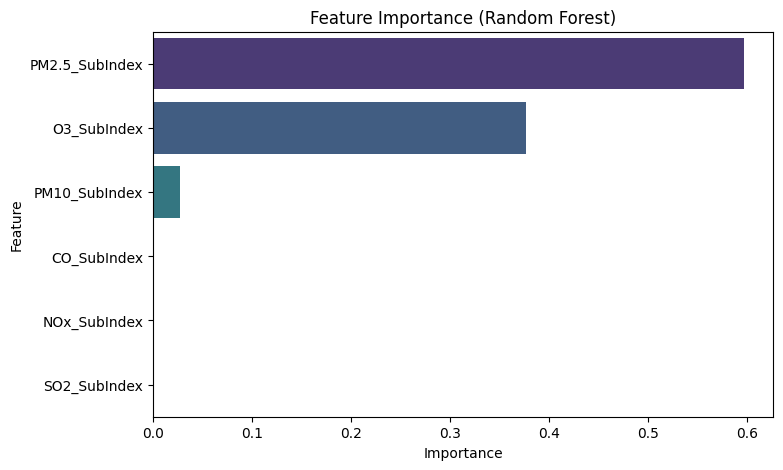

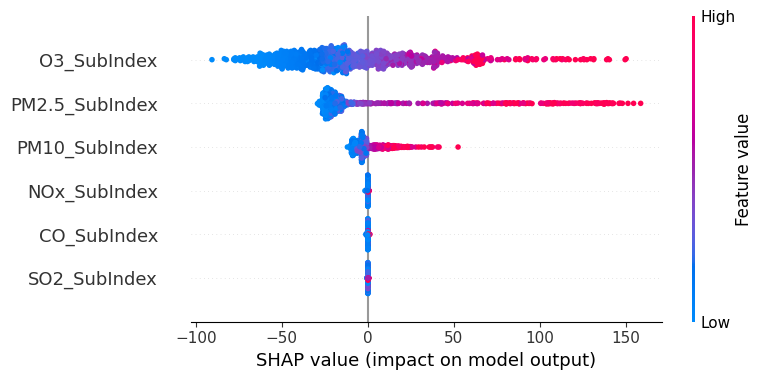

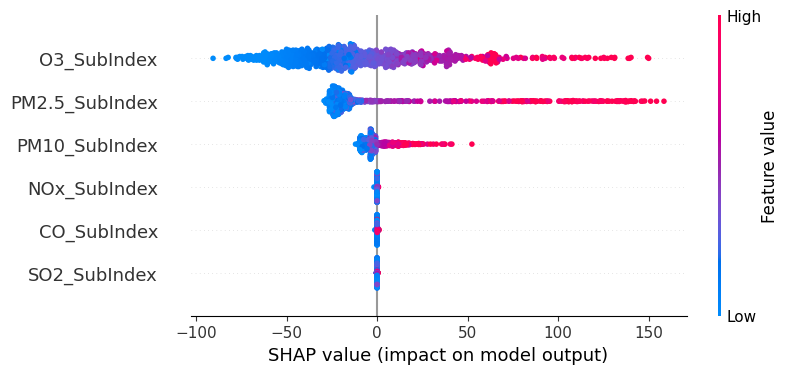

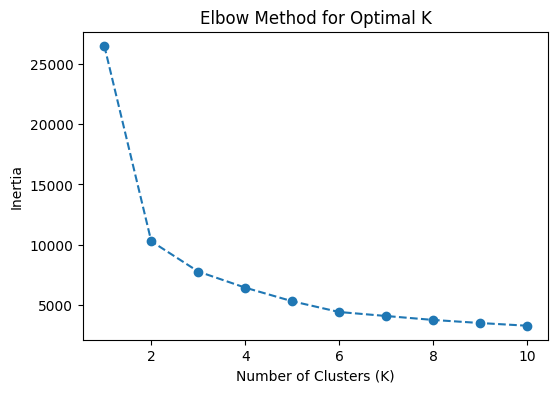

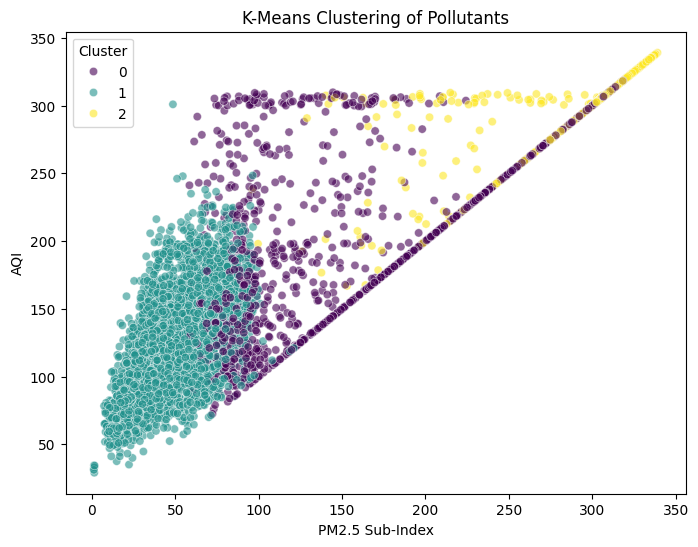

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Update path

# Convert pollutant values to sub-indices (Assuming get_PM25_subindex() etc. are defined)
df["PM2.5_SubIndex"] = df["pm2_5 (μg/m³)"].apply(lambda x: get_PM25_subindex(x) if pd.notna(x) else None)
df["PM10_SubIndex"] = df["pm10 (μg/m³)"].apply(lambda x: get_PM10_subindex(x) if pd.notna(x) else None)
df["SO2_SubIndex"] = df["sulphur_dioxide (μg/m³)"].apply(lambda x: get_SO2_subindex(x) if pd.notna(x) else None)
df["NOx_SubIndex"] = df["nitrogen_dioxide (μg/m³)"].apply(lambda x: get_NOx_subindex(x) if pd.notna(x) else None)
df["CO_SubIndex"] = df["carbon_monoxide (μg/m³)"].apply(lambda x: get_CO_subindex(x) if pd.notna(x) else None)
df["O3_SubIndex"] = df["ozone (μg/m³)"].apply(lambda x: get_O3_subindex(x) if pd.notna(x) else None)

# Drop rows with missing values
df.dropna(subset=["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex", "CO_SubIndex", "O3_SubIndex", "AQI"], inplace=True)

# Define Features and Target
X = df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex", "CO_SubIndex", "O3_SubIndex"]]
y = df["AQI"]

# Split dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"MAE: {mae:.2f}")
print(f" MSE: {mse:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.4f}")

# ---------------------------------
# 🔹 Feature Importance (Random Forest)
# ---------------------------------
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# ---------------------------------
# 🔹 SHAP Analysis
# ---------------------------------
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)  # Global SHAP Summary Plot
shap.plots.beeswarm(shap_values)  # Beeswarm Plot for Individual Impact

# ---------------------------------
# 🔹 K-Means Clustering (To group areas with similar pollution patterns)
# ---------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding optimal K using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means with optimal K (Assuming K=3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PM2.5_SubIndex"], y=df["AQI"], hue=df["Cluster"], palette="viridis", alpha=0.6)
plt.xlabel("PM2.5 Sub-Index")
plt.ylabel("AQI")
plt.title("K-Means Clustering of Pollutants")
plt.legend(title="Cluster")
plt.show()


In [18]:
# Ensure that we only use the features that were used in training
trained_features = rf_model.feature_names_in_

# Create DataFrame with correct feature names
importance_df = pd.DataFrame({
    'Feature': trained_features,  
    'Importance': rf_model.feature_importances_
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print values
print(importance_df)


          Feature  Importance
0  PM2.5_SubIndex    0.596071
5     O3_SubIndex    0.376076
1   PM10_SubIndex    0.027437
4     CO_SubIndex    0.000156
3    NOx_SubIndex    0.000141
2    SO2_SubIndex    0.000119


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score

# ✅ Random Forest Accuracy Metrics
y_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print(f"📌 Random Forest Performance:")
print(f"   - MAE: {mae_rf:.2f}")
print(f"   - MSE: {mse_rf:.2f}")
print(f"   - RMSE: {rmse_rf:.2f}")
print(f"   - R² Score: {r2_rf:.4f}")

# ✅ SHAP does not have a direct accuracy metric but visualizes feature importance

# ✅ Clustering Accuracy (Silhouette Score)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"\n📌 K-Means Clustering Performance:")
print(f"   - Silhouette Score: {silhouette_avg:.4f}")


📌 Random Forest Performance:
   - MAE: 0.45
   - MSE: 2.38
   - RMSE: 1.54
   - R² Score: 0.9996

📌 K-Means Clustering Performance:
   - Silhouette Score: 0.6272
